In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import datetime as dt
df = pd.read_excel('All Efficiency @7am-4pm.xlsx')

In [14]:
df

,Time,SQ8,SQ9,SQ10,SQ11,SQ12,SQ13,SQ14,SQ16,SQ18,SQ19,Tower A
0,2022-09-01 07:00:00,1.273944,0.663523,0.362896,1.124069,0.824776,0.689336,1.453342,0.672188,0.726024,0.719740,1.539291
1,2022-09-01 08:00:00,4.214451,3.050130,1.953259,4.636374,2.821488,3.309979,4.562908,3.767190,3.099928,3.875329,6.267273
2,2022-09-01 09:00:00,8.858642,6.991746,3.534324,8.935571,5.185229,7.143181,9.488848,7.643579,5.729931,7.251438,12.513581
3,2022-09-01 10:00:00,11.454129,8.765165,5.275160,11.412665,7.009799,8.868968,11.956675,9.255631,6.571451,9.380418,15.076185
4,2022-09-01 11:00:00,15.748784,11.985070,7.577086,15.405090,9.355021,11.454732,15.834919,11.795755,8.366484,12.762331,19.515136
...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2023-08-31 11:00:00,5.119208,5.373661,5.237756,5.137578,5.090951,5.511174,5.135908,5.442042,NaN,5.187386,6.157952
3281,2023-08-31 12:00:00,9.550053,9.955819,9.620424,9.425863,9.349077,10.002414,9.332246,9.470461,0.000000,9.512812,11.085884
3282,2023-08-31 13:00:00,9.830698,10.236098,10.144222,10.029310,10.122610,10.615333,10.187852,10.501092,0.000000,9.899705,11.120259
3283,2023-08-31 14:00:00,14.421493,14.491891,15.141279,13.645442,14.678794,15.307472,13.948168,15.125291,0.000000,14.634237,16.444224


Average Efficiency per day

In [15]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
daily_df = df.resample('D').mean()
daily_df



,SQ8,SQ9,SQ10,SQ11,SQ12,SQ13,SQ14,SQ16,SQ18,SQ19,Tower A
Time,,,,,,,,,,,
2022-09-01,16.014763,11.463430,8.924925,15.425147,10.361001,12.174136,16.290260,12.202480,9.618928,13.160199,19.236932
2022-09-02,13.525101,9.756643,8.314123,13.219416,7.330059,9.535037,11.808291,10.039695,8.000481,10.975815,16.330123
2022-09-03,14.025334,9.879274,9.185118,13.366729,9.163934,10.759392,14.196270,10.547825,8.074859,11.086419,16.893113
2022-09-04,13.918724,9.726691,9.017738,13.239008,9.073269,10.571658,14.012837,10.479237,8.014086,11.018871,16.918515
2022-09-05,13.643916,9.609154,9.240024,13.112211,9.010830,10.555939,13.850123,10.088936,7.911051,10.735618,16.164020
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,7.796312,8.068810,8.030416,7.486452,7.745592,8.313484,7.717108,7.961784,0.000000,7.666059,9.372775
2023-08-28,9.598912,9.947942,9.702851,9.482202,9.417066,10.221341,9.689090,10.209809,0.000000,9.683476,11.735567
2023-08-29,13.143370,13.516250,13.917644,13.475364,13.933168,14.893007,15.029881,16.660398,0.000000,15.607224,15.279392


Data Clear

In [16]:
#Remove all data with values >40, while the name of each column is the name of the location
for column in daily_df:
    cleaned_df = daily_df[daily_df[column] < 40]
    cleaned_df = daily_df[daily_df[column] >= 0]
cleaned_df



,SQ8,SQ9,SQ10,SQ11,SQ12,SQ13,SQ14,SQ16,SQ18,SQ19,Tower A
Time,,,,,,,,,,,
2022-09-01,16.014763,11.463430,8.924925,15.425147,10.361001,12.174136,16.290260,12.202480,9.618928,13.160199,19.236932
2022-09-02,13.525101,9.756643,8.314123,13.219416,7.330059,9.535037,11.808291,10.039695,8.000481,10.975815,16.330123
2022-09-03,14.025334,9.879274,9.185118,13.366729,9.163934,10.759392,14.196270,10.547825,8.074859,11.086419,16.893113
2022-09-04,13.918724,9.726691,9.017738,13.239008,9.073269,10.571658,14.012837,10.479237,8.014086,11.018871,16.918515
2022-09-05,13.643916,9.609154,9.240024,13.112211,9.010830,10.555939,13.850123,10.088936,7.911051,10.735618,16.164020
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,7.796312,8.068810,8.030416,7.486452,7.745592,8.313484,7.717108,7.961784,0.000000,7.666059,9.372775
2023-08-28,9.598912,9.947942,9.702851,9.482202,9.417066,10.221341,9.689090,10.209809,0.000000,9.683476,11.735567
2023-08-29,13.143370,13.516250,13.917644,13.475364,13.933168,14.893007,15.029881,16.660398,0.000000,15.607224,15.279392


Average Monthly Efficiency of all location

In [17]:
#Find the monthly average data
monthly_df = cleaned_df.resample('M').mean()
monthly_df

,SQ8,SQ9,SQ10,SQ11,SQ12,SQ13,SQ14,SQ16,SQ18,SQ19,Tower A
Time,,,,,,,,,,,
2022-09-30,14.293564,10.087305,9.493426,13.788822,9.319719,10.982565,14.448147,10.483208,7.757262,-0.484513,17.123320
2022-10-31,14.247430,7.044716,11.130503,13.597235,10.575364,12.312175,14.321387,11.613032,7.418523,7.330390,17.105123
2022-11-30,12.456808,12.780322,12.234871,11.896955,12.347945,13.436521,11.898369,12.140427,9.126720,9.956483,15.401789
2022-12-31,11.868286,12.063891,12.043795,11.636795,11.426263,12.317815,8.819259,12.646601,10.850685,11.104710,15.263649
2023-01-31,10.852621,11.141954,11.099620,10.803020,10.545322,11.448408,10.554249,11.109710,9.990979,10.334803,13.103611
2023-02-28,11.349590,11.695098,11.366711,11.413370,5.920734,12.118610,11.230275,11.804674,11.056363,10.907647,13.633438
2023-03-31,7.743136,7.997392,7.962638,7.792634,7.592543,8.153020,7.577617,8.106582,7.686855,7.711341,9.199243
2023-04-30,7.937850,8.302667,8.267090,8.026542,7.944751,8.525372,7.938877,8.411629,8.265283,7.999773,9.480826
2023-05-31,8.846164,9.245957,9.251786,8.940718,8.863940,9.509876,8.850943,9.422667,9.389103,8.985376,10.427861


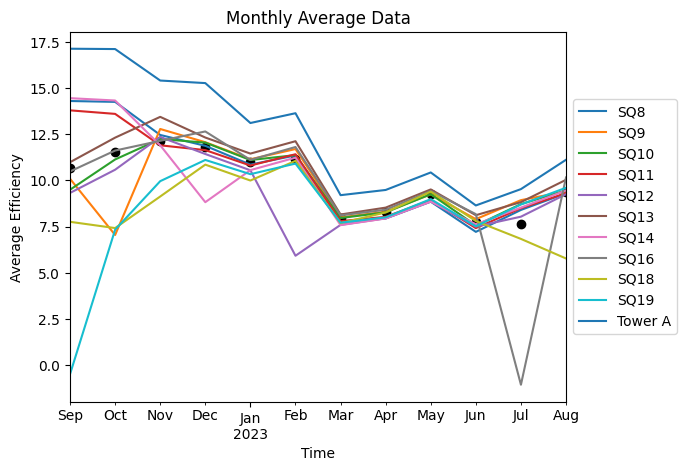

In [18]:
#Plot the monthly average data of all locations
monthly_df.plot()
plt.title('Monthly Average Data')
plt.xlabel('Time')
plt.ylabel('Average Efficiency')
#Hide the mention of the location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#add a scatter plot for the line showing the average value of the data
plt.scatter(monthly_df.index, monthly_df.mean(axis=1), color='black')
#remove the data of "all locations"
plt.show()

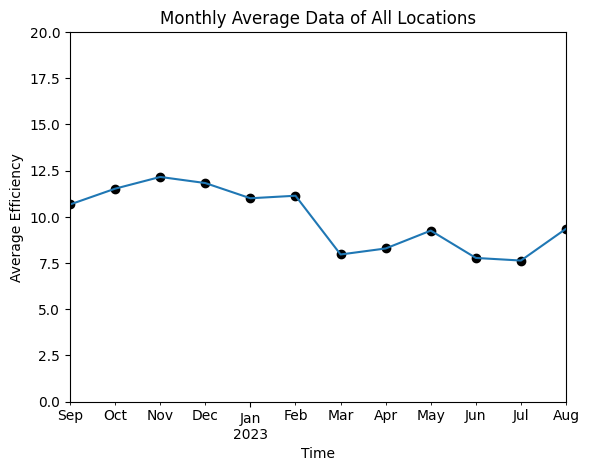

In [19]:
#Combine them into one line and plot the monthly average data of all locations
monthly_df['All Locations'] = monthly_df.mean(axis=1)
monthly_df['All Locations'].plot()
plt.title('Monthly Average Data of All Locations')
plt.xlabel('Time')
plt.ylabel('Average Efficiency')
#adjust the lower and upper bound
plt.ylim(0, 20)
#add a scatter plot for the line showing the average value of the data
plt.scatter(monthly_df.index, monthly_df['All Locations'], color='black')
plt.show()

Hourly data

In [20]:
df

,SQ8,SQ9,SQ10,SQ11,SQ12,SQ13,SQ14,SQ16,SQ18,SQ19,Tower A
Time,,,,,,,,,,,
2022-09-01 07:00:00,1.273944,0.663523,0.362896,1.124069,0.824776,0.689336,1.453342,0.672188,0.726024,0.719740,1.539291
2022-09-01 08:00:00,4.214451,3.050130,1.953259,4.636374,2.821488,3.309979,4.562908,3.767190,3.099928,3.875329,6.267273
2022-09-01 09:00:00,8.858642,6.991746,3.534324,8.935571,5.185229,7.143181,9.488848,7.643579,5.729931,7.251438,12.513581
2022-09-01 10:00:00,11.454129,8.765165,5.275160,11.412665,7.009799,8.868968,11.956675,9.255631,6.571451,9.380418,15.076185
2022-09-01 11:00:00,15.748784,11.985070,7.577086,15.405090,9.355021,11.454732,15.834919,11.795755,8.366484,12.762331,19.515136
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 11:00:00,5.119208,5.373661,5.237756,5.137578,5.090951,5.511174,5.135908,5.442042,NaN,5.187386,6.157952
2023-08-31 12:00:00,9.550053,9.955819,9.620424,9.425863,9.349077,10.002414,9.332246,9.470461,0.000000,9.512812,11.085884
2023-08-31 13:00:00,9.830698,10.236098,10.144222,10.029310,10.122610,10.615333,10.187852,10.501092,0.000000,9.899705,11.120259


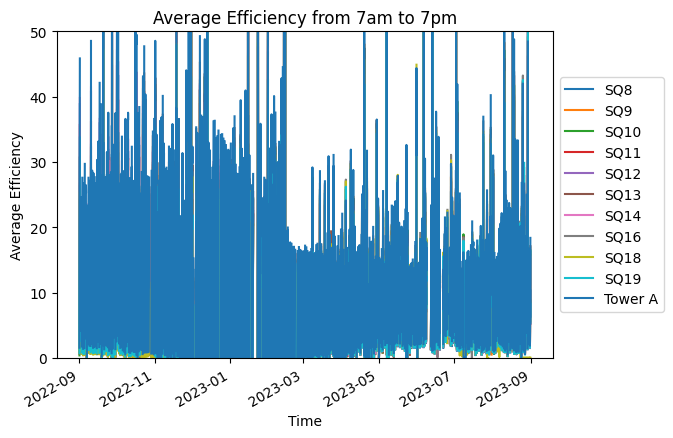

In [21]:
hourly_df = df.resample('H').mean()
hourly_df
#I want the average hourly data from 7am to 7pm, don't have to care about the date
hourly_df = hourly_df.between_time('07:00:00', '19:00:00')
#Plot a graph with x axis is time period from 7am to 7pm, y axis is the average efficiency
hourly_df.plot()
plt.title('Average Efficiency from 7am to 7pm')
plt.xlabel('Time')
plt.ylabel('Average Efficiency')
#adjust the legend
plt.ylim(0, 50)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



Location data

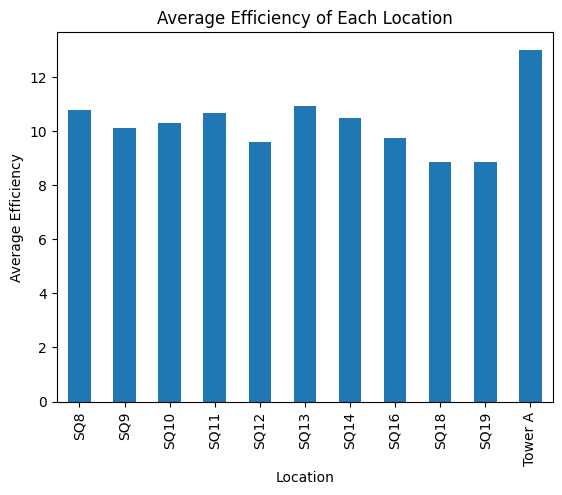

In [22]:
# I want to know the average efficiency of each location at each hour
hourly_df.mean()
hourly_df.mean().plot(kind='bar')
plt.title('Average Efficiency of Each Location')
plt.xlabel('Location')
plt.ylabel('Average Efficiency')
plt.show()

Hourly variation

ValueError: zero-size array to reduction operation fmin which has no identity

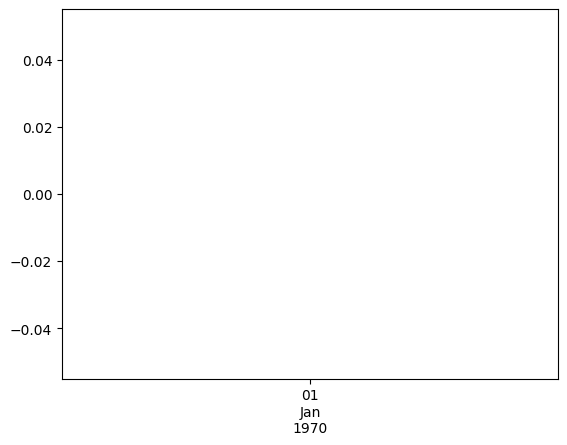

In [18]:
#I want the avaergae data of 07:00:00 of each day
hour_df = df.resample('D').mean()
am_df = hour_df.between_time('07:00:00', '08:00:00')    
am_df.plot()
plt.title('Average Efficiency at 07:00:00')